<a href="https://colab.research.google.com/github/Tobeodeh/house-prediction/blob/Prediction/Tobechukwudevtown_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy.stats import skew
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

Importing the dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Housing.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.shape

(545, 13)

CLEANING THE DATA

In [ ]:
#checking for missing value
print("all values missing in the dataset:",sum(df.isna().sum()))

all values missing in the dataset: 0


In [ ]:
df["price"].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

In [ ]:
#looking for features that are correlated to the price
feature_coll = df.select_dtypes(include = [np.number])
correlation = feature_coll.corr()
print("features correlated with the price"), print(correlation["price"].sort_values(ascending = False)[:14], "\n")


features correlated with the price
price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64 



(None, None)

Text(0.5, 0, 'area')

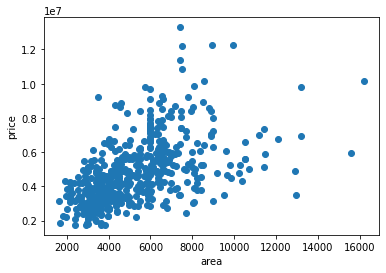

In [ ]:
#checking data for outliers
plt.scatter(x = df["area"], y = df["price"])
plt.ylabel("price")
plt.xlabel("area")

Text(0.5, 0, 'stories')

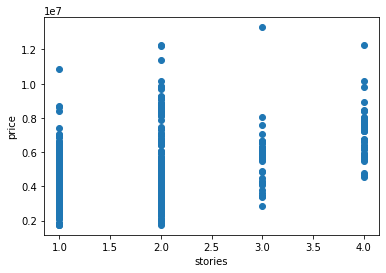

In [ ]:
plt.scatter(x = df["stories"], y = df["price"])
plt.ylabel("price")
plt.xlabel("stories")

In [ ]:
#removing outliers
df = df[df["area"]<12000]

In [ ]:

df_missval = df.isnull().sum()/ df.shape[0]
print(df_missval[df_missval > 0.90])
df = df.drop(df_missval[df_missval > 0.90].index, axis = 1)


Series([], dtype: float64)


Converting categorical datas to numerical datas

In [ ]:
change = preprocessing.LabelEncoder()
for name in df.columns:
  if df[name].dtypes == "o":
    df[name] = df[name].astype(str)
    change.fit(df[name])
    df[name] = change.transform(df[name])

df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
#reducing skeweness using log transformation
skewed_df = df.apply(lambda x: skew(x.dropna()))
skewed_df = skewed_df[skewed_df > 0.25]
df[skewed_df.index] = np.log1p(df[skewed_df.index])

Defining X and Y

In [ ]:
X = df.drop(["furnishingstatus_unfurnished","price"], axis=1).values
y = df["price"].values


In [ ]:

print(X)

[[8.9120691  1.60943791 0.27118559 ... 0.234375   0.234375   0.        ]
 [9.10063711 1.60943791 0.29795892 ... 0.234375   0.         0.        ]
 [9.20643275 1.38629436 0.27118559 ... 0.         0.234375   0.4230957 ]
 ...
 [8.19450551 1.09861229 0.23430729 ... 0.         0.         0.        ]
 [7.97625194 1.38629436 0.23430729 ... 0.         0.         0.        ]
 [8.25608813 1.38629436 0.23430729 ... 0.         0.         0.        ]]


SPLITING DATASET TO TRAINING AND TEST SET

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)




FINDING LINEAR REGRESSION

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

PREDICTING THE TEST RESULT

In [ ]:
y_pred = lin_reg.predict(X_test)
y_pred

array([2.79433534, 2.77236623, 2.79524017, 2.76742855, 2.75736535,
       2.79477092, 2.76592274, 2.78622682, 2.79358613, 2.80267222,
       2.79314412, 2.80374704, 2.75202483, 2.77744455, 2.79136042,
       2.78138411, 2.76207834, 2.76337098, 2.76434229, 2.82734196,
       2.78419035, 2.7841422 , 2.81329351, 2.79235973, 2.81147984,
       2.77262329, 2.77809252, 2.78296145, 2.81680413, 2.82276409,
       2.78332937, 2.79166471, 2.80731094, 2.7709813 , 2.82397101,
       2.81741918, 2.78002248, 2.80084484, 2.78935141, 2.77500829,
       2.81684967, 2.78402295, 2.78835706, 2.79503135, 2.81522668,
       2.76564392, 2.76071046, 2.81034846, 2.77000894, 2.8058235 ,
       2.75327989, 2.7967266 , 2.79838321, 2.76764193, 2.79198596,
       2.81389423, 2.82247272, 2.81536119, 2.81676606, 2.77842384,
       2.77175536, 2.80591152, 2.80971313, 2.77877018, 2.78153118,
       2.81297831, 2.79699923, 2.79458007, 2.81121419, 2.76909591,
       2.7768222 , 2.77799452, 2.80742436, 2.78758161, 2.80500

In [ ]:
r2_score(y_test,y_pred)


0.7033246616096029

Plotting the graph

Text(0, 0.5, 'Predicted')

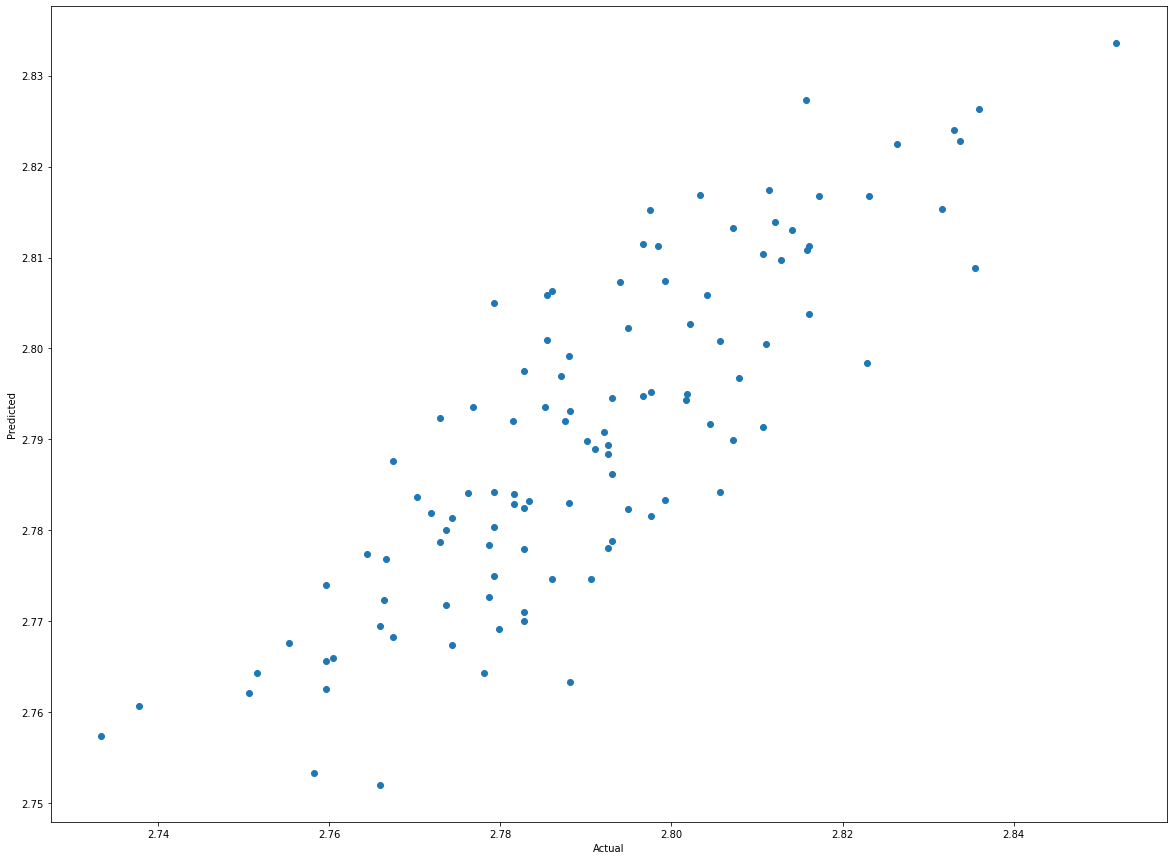

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [ ]:
X_test[:1]

array([[8.70797883, 1.38629436, 0.23430729, 0.35279252, 0.        ,
        1.        , 0.        , 0.30224609, 0.        , 0.        ,
        0.234375  , 0.4230957 ]])